In [ ]:
!pip install --upgrade tensorflow


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [ ]:
# Import libraries
import tensorflow as tf 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0'

In [ ]:
# Import dataset
df = pd.read_csv("cardio_train.csv", sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
# Divide dataset Train set & Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()


print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

[[6.7617e+04 2.1876e+04 1.0000e+00 1.5400e+02 8.0000e+01 1.3000e+02
  9.0000e+01 2.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [9.6320e+04 1.6717e+04 2.0000e+00 1.6200e+02 7.0000e+01 1.4000e+02
  9.0000e+01 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.7571e+04 2.1128e+04 2.0000e+00 1.7400e+02 9.2000e+01 1.5000e+02
  1.0000e+02 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [4.6492e+04 2.3366e+04 2.0000e+00 1.7300e+02 7.6000e+01 1.2000e+02
  8.2000e+01 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [9.4500e+02 2.0281e+04 1.0000e+00 1.6000e+02 6.0000e+01 1.2000e+02
  8.0000e+01 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]]
[[6.6728e+04 2.1770e+04 1.0000e+00 1.5600e+02 6.4000e+01 1.4000e+02
  8.0000e+01 2.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [6.9098e+04 2.1876e+04 1.0000e+00 1.7000e+02 8.5000e+01 1.6000e+02
  9.0000e+01 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]]

[1 1 1 1 0]
[1 1]


In [ ]:
# Normalize datas
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=15, input_dim=12, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=12, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=8, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
    ])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15)                195       
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 12)                192       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                

In [ ]:
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.95,
    staircase=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=20, batch_size=15)

Epoch 1/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.6476 - binary_accuracy: 0.6184
Epoch 2/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.6055 - binary_accuracy: 0.6829
Epoch 3/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5816 - binary_accuracy: 0.7104
Epoch 4/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5725 - binary_accuracy: 0.7168
Epoch 5/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5673 - binary_accuracy: 0.7217
Epoch 6/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5610 - binary_accuracy: 0.7239
Epoch 7/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5586 - binary_accuracy: 0.7243
Epoch 8/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5557 - binary_accuracy: 0.7261
Epoch 9/20
3734/3734 [==============================] - 9s 2ms/step - loss: 0.5539 - binary_accuracy: 0.7283
Epoch 10/20
3734/37

In [ ]:
# Evaluate the model
model.evaluate(X_test, Y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.5455 - binary_accuracy: 0.7398


[0.5455322861671448, 0.7397857308387756]

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=15,
                    validation_data=(X_test, Y_test)
                    )

Epoch 1/20
3734/3734 [==============================] - 11s 3ms/step - loss: 0.5469 - binary_accuracy: 0.7310 - val_loss: 0.5444 - val_binary_accuracy: 0.7387
Epoch 2/20
3734/3734 [==============================] - 11s 3ms/step - loss: 0.5470 - binary_accuracy: 0.7316 - val_loss: 0.5463 - val_binary_accuracy: 0.7398
Epoch 3/20
3734/3734 [==============================] - 11s 3ms/step - loss: 0.5456 - binary_accuracy: 0.7327 - val_loss: 0.5467 - val_binary_accuracy: 0.7390
Epoch 4/20
3734/3734 [==============================] - 11s 3ms/step - loss: 0.5458 - binary_accuracy: 0.7311 - val_loss: 0.5472 - val_binary_accuracy: 0.7381
Epoch 5/20
3734/3734 [==============================] - 11s 3ms/step - loss: 0.5465 - binary_accuracy: 0.7321 - val_loss: 0.5447 - val_binary_accuracy: 0.7384
Epoch 6/20
3734/3734 [==============================] - 11s 3ms/step - loss: 0.5457 - binary_accuracy: 0.7323 - val_loss: 0.5422 - val_binary_accuracy: 0.7379
Epoch 7/20
3734/3734 [========================

In [ ]:
history.history

{'binary_accuracy': [0.7309643030166626,
  0.7316428422927856,
  0.732660710811615,
  0.7311071157455444,
  0.7321071624755859,
  0.732285737991333,
  0.7310000061988831,
  0.7325893044471741,
  0.7329821586608887,
  0.7319107055664062,
  0.7324464321136475,
  0.7338749766349792,
  0.7325000166893005,
  0.7330357432365417,
  0.7317678332328796,
  0.7323392629623413,
  0.7328928709030151,
  0.7324821352958679,
  0.7321606874465942,
  0.7329285740852356],
 'loss': [0.5468693375587463,
  0.547003984451294,
  0.5455795526504517,
  0.5458277463912964,
  0.5465341806411743,
  0.5456971526145935,
  0.5450491905212402,
  0.545491635799408,
  0.5452516674995422,
  0.5458323955535889,
  0.5447980761528015,
  0.5447447896003723,
  0.5450264811515808,
  0.5441434383392334,
  0.5442334413528442,
  0.5447677969932556,
  0.5439000725746155,
  0.5438538193702698,
  0.5442581176757812,
  0.5443130731582642],
 'val_binary_accuracy': [0.7387142777442932,
  0.7397857308387756,
  0.7390000224113464,
  0.73

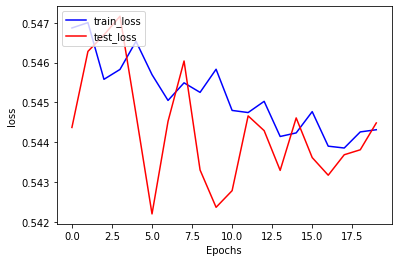

In [ ]:
# Visualize losses (train and test) as the epochs progress
plt.plot(history.history["loss"], color="b", label="train_loss" )
plt.plot(history.history["val_loss"], color="r", label="test_loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.show()

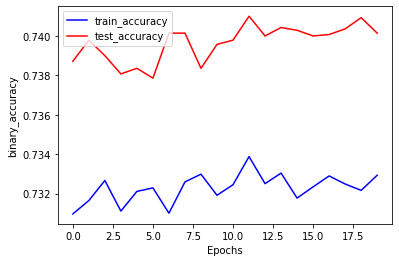

In [ ]:
# Visualize accuracies (train et test) as the epochs progress
plt.plot(history.history["binary_accuracy"], color="b", label="train_accuracy")
plt.plot(history.history["val_binary_accuracy"], color="r", label="test_accuracy")
plt.ylabel("binary_accuracy")
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# The score on the train set
Score_train = model.evaluate(X_train, Y_train)
print("\n Training Accuracy:", Score_train[1])

1750/1750 [==============================] - 3s 2ms/step - loss: 0.5430 - binary_accuracy: 0.7361

 Training Accuracy: 0.7361071705818176


In [ ]:
# The score on the test set
Score_test = model.evaluate(X_test, Y_test)
print("\n Testing Accuracy:", Score_test[1])

438/438 [==============================] - 1s 2ms/step - loss: 0.5445 - binary_accuracy: 0.7401

 Testing Accuracy: 0.7401428818702698


In [ ]:
Y_train_pred = model.predict(X_train)
Y_train_pred

array([[0.7364496 ],
       [0.83202547],
       [0.84628373],
       ...,
       [0.58542675],
       [0.35014978],
       [0.21636996]], dtype=float32)

In [ ]:
Y_test_pred = model.predict(X_test)
for i in Y_test_pred :
  if i > 0.5 :
    i = 1 
  else :
    i = 0
Y_test_pred 

array([[0.8458136 ],
       [0.85222006],
       [0.6425967 ],
       ...,
       [0.517631  ],
       [0.61767215],
       [0.831128  ]], dtype=float32)

In [ ]:
Y_test_pred = model.predict(X_test)
Y_test_pred

array([[0.8458136 ],
       [0.85222006],
       [0.6425967 ],
       ...,
       [0.517631  ],
       [0.61767215],
       [0.831128  ]], dtype=float32)

Confusion matrix on train set : 


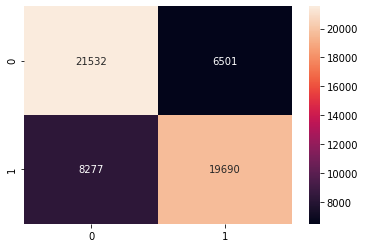

In [ ]:
print("Confusion matrix on train set : ")
cm = tf.math.confusion_matrix(Y_train, Y_train_pred.round())
_=sns.heatmap(cm, annot=True, fmt="d")

Confusion matrix on test set : 


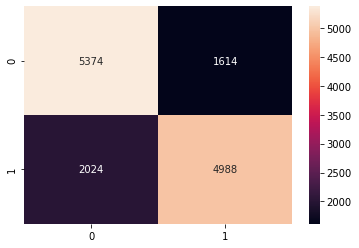

In [ ]:
print("Confusion matrix on test set : ")
cm = tf.math.confusion_matrix(Y_test, Y_test_pred.round())
_=sns.heatmap(cm, annot=True, fmt="d")